# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df = pd.read_csv('./drive/MyDrive/titanic_train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [29]:
train_data = df.sample(frac = 0.7, random_state = 200)
test_data = df.drop(train_data.index)
train_data.head(), test_data.head()

(             Survived  Pclass  \
 PassengerId                     
 660                 0       1   
 526                 0       3   
 829                 1       3   
 754                 0       3   
 519                 1       2   
 
                                                           Name     Sex   Age  \
 PassengerId                                                                    
 660                                 Newell, Mr. Arthur Webster    male  58.0   
 526                                         Farrell, Mr. James    male  40.5   
 829                               McCormack, Mr. Thomas Joseph    male   NaN   
 754                                         Jonkoff, Mr. Lalio    male  23.0   
 519          Angle, Mrs. William A (Florence "Mary" Agnes H...  female  36.0   
 
              SibSp  Parch  Ticket      Fare Cabin Embarked  
 PassengerId                                                 
 660              0      2   35273  113.2750   D48        C  
 526 

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

Дополнительно после выделения нескольких признаков мы удаляем строчки, в которых были пропущены значения

In [30]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак
a = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

def get_features_and_target(data):
    data = data[a].dropna()
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [31]:
x_train, y_train = get_features_and_target(train_data)
x_test, y_test = get_features_and_target(test_data)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

Для первичного анализа признаков численного типа и дальнейшей их нормализации выведем их максимальное, минимальное и  среднее значение

In [32]:
x_train.describe(), y_train.describe()

(           Pclass         Age       SibSp       Parch        Fare
 count  496.000000  496.000000  496.000000  496.000000  496.000000
 mean     2.243952   29.612560    0.550403    0.431452   36.500025
 std      0.835430   14.677426    0.964773    0.859492   57.038342
 min      1.000000    0.750000    0.000000    0.000000    0.000000
 25%      1.000000   20.000000    0.000000    0.000000    8.050000
 50%      2.500000   28.000000    0.000000    0.000000   15.900000
 75%      3.000000   38.000000    1.000000    1.000000   35.500000
 max      3.000000   74.000000    5.000000    6.000000  512.329200,
 count    496.000000
 mean       0.397177
 std        0.489807
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        1.000000
 max        1.000000
 Name: Survived, dtype: float64)

Построили гистограммы для каждого признака из features_columns и оставили те, на которых есть зависимость выживаемости от признака

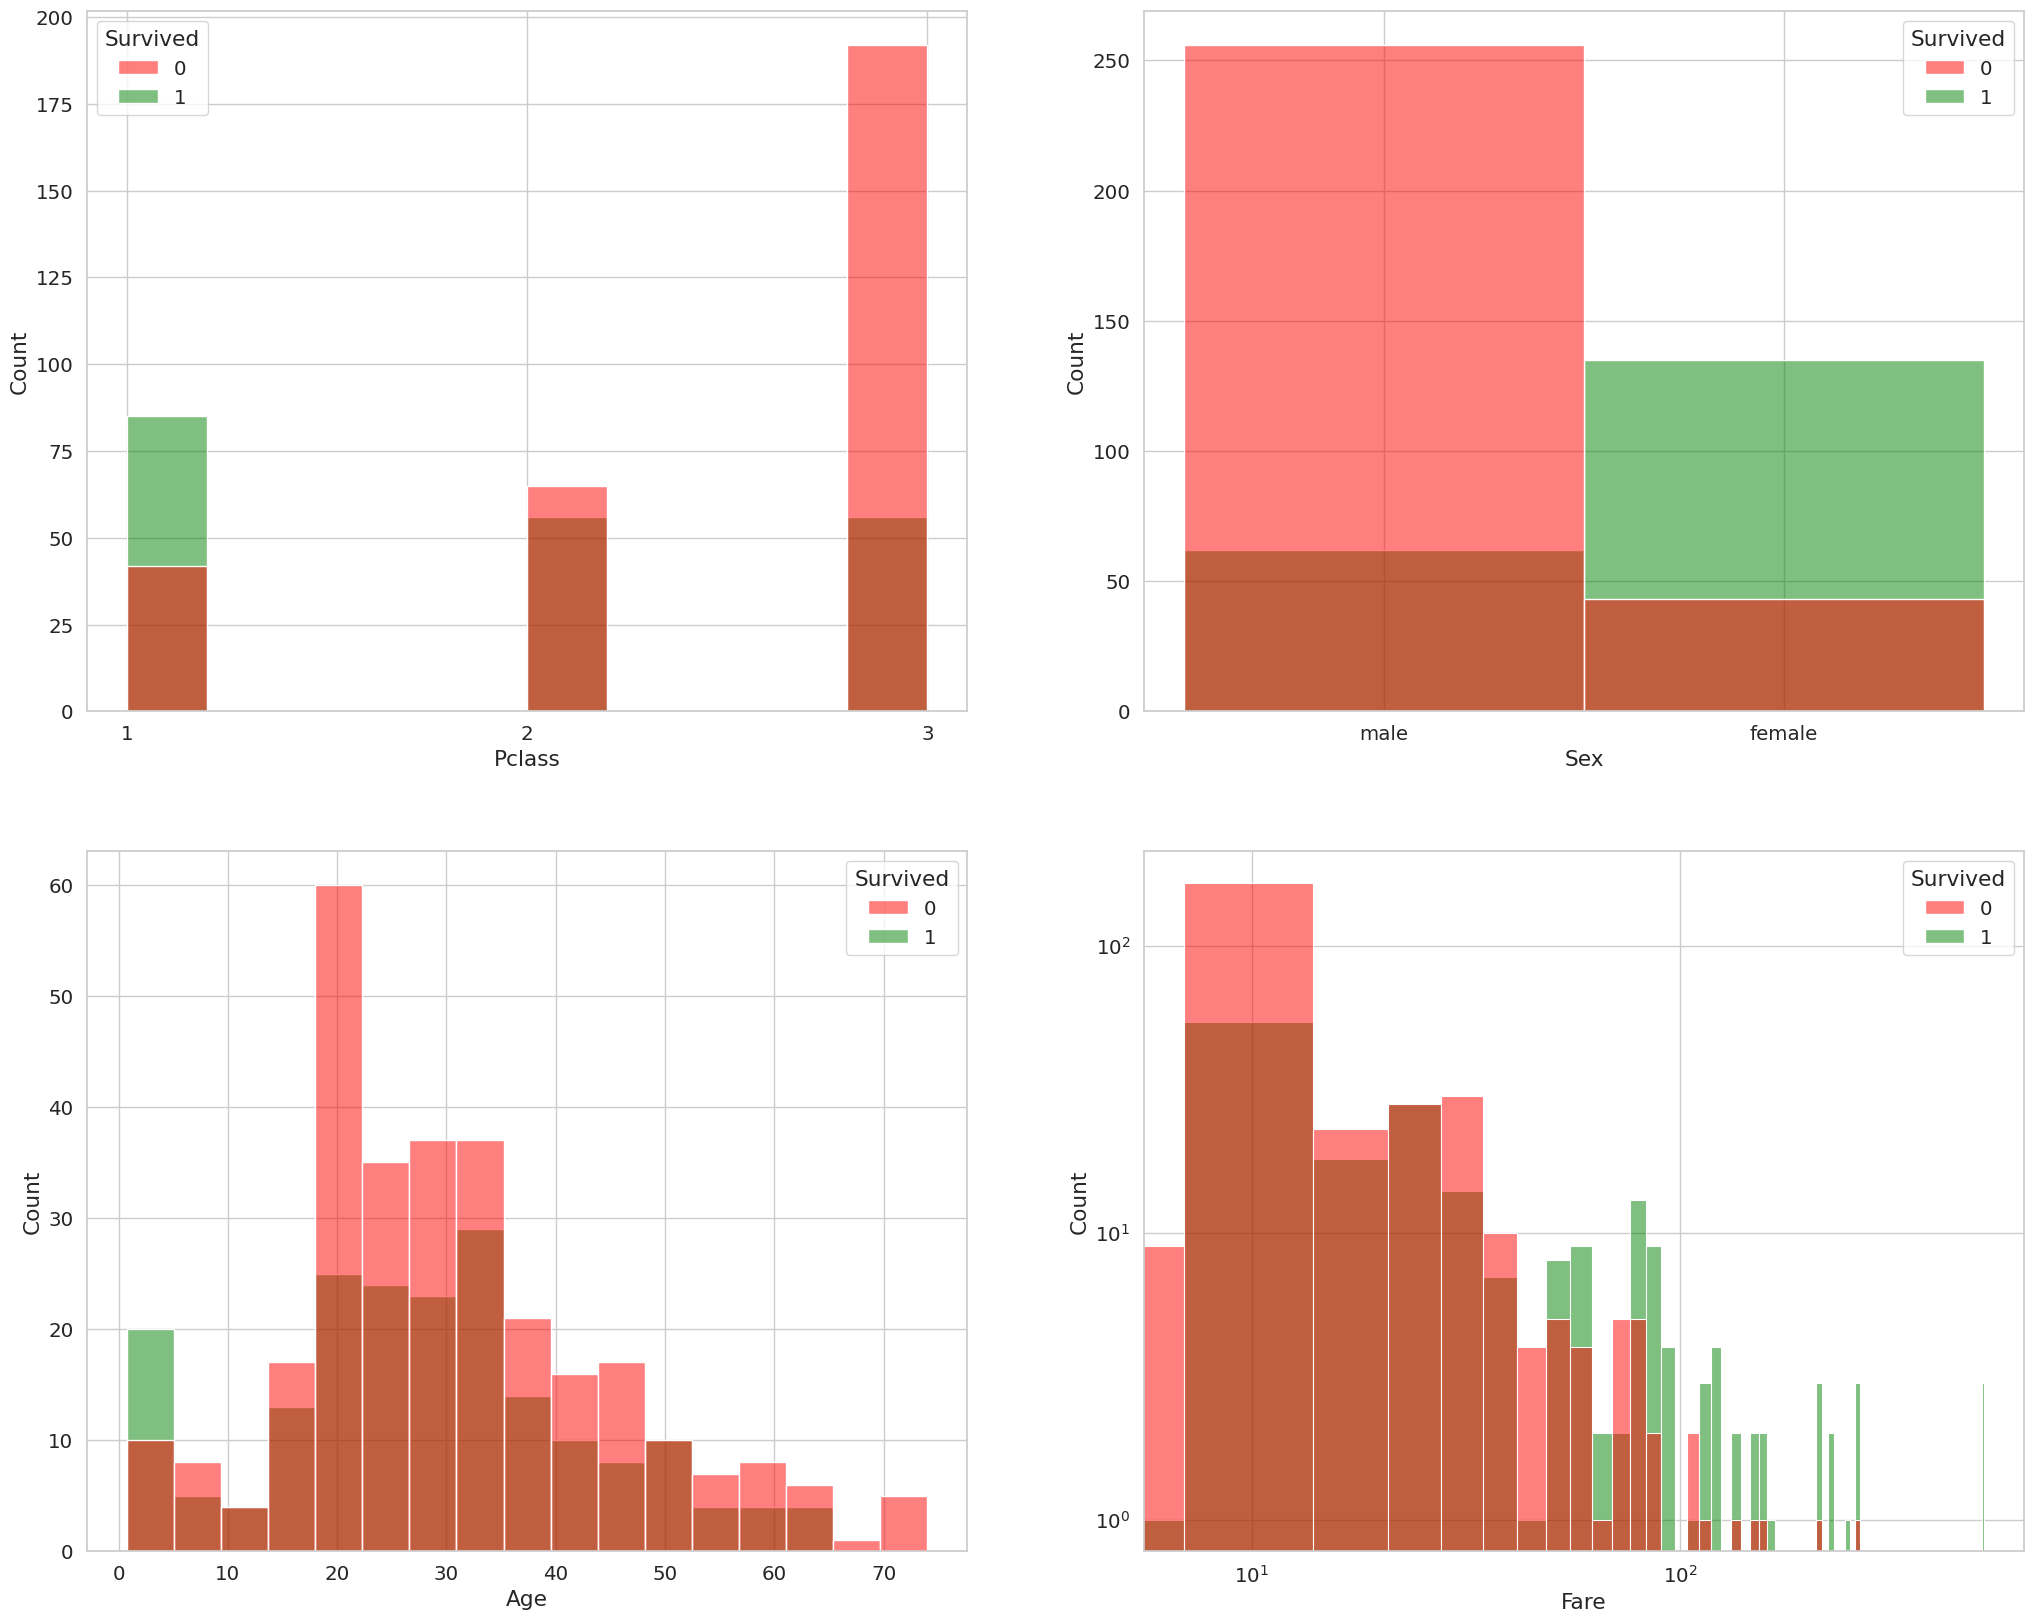

In [33]:
plt.figure(figsize=(25, 20))
i = 1
for category in ['Pclass', 'Sex', 'Age', 'Fare']:
    plt.subplot(2, 2, i)
    sns.histplot(data=x_test, x=x_train[category], hue = y_train, palette={1:'g', 0:'r'})
    if category == 'Fare':
      plt.xscale('log')
      plt.yscale('log')
    elif category == 'Pclass' :
      plt.xticks(ticks=[1, 2, 3])
    i += 1

По полученным графикам видно, что пол влияет на целевую переменную. То есть, около 80% мужчин и 30% женщин погибло. По графику зависимости количества выживших от возраста можно заметить, что выживших детей почти в 2 раза больше, чем умерших, а среди пассажиров старше 10 лет количество умерших почти в 2 раза больше. От класса пассажира выживаемость так же зависит: для 1 класса больше половины выжило и, наоборот, для 3 класса много больше половины людей погибло, но для людей 2 класса нет явного преобладания какого то класса. По последнему графику видно, что среди людей заплативших больше 100 почти все выжили.

Для дальнейшей работы с даннными их надо привести признак строкового типа к численному, чтобы по этому признаку тоже можно было расстояние между точками

In [34]:
# сделали все данные численного типа для train
x_train.loc[x_train['Sex'] == 'male', 'Sex'] = 0
x_train.loc[x_train['Sex'] == 'female', 'Sex'] = 1
x_train['Sex'] = x_train['Sex'].astype(int)
x_train = x_train.dropna()

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 660 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  496 non-null    int64  
 1   Sex     496 non-null    int64  
 2   Age     496 non-null    float64
 3   SibSp   496 non-null    int64  
 4   Parch   496 non-null    int64  
 5   Fare    496 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 27.1 KB


In [35]:
x_men = x_train.loc[x_train['Sex'] == 0]
x_women = x_train.loc[x_train['Sex'] == 1]
y_men = y_train.drop(x_women.index)
y_women = y_train.drop(x_men.index)
x_women.info(), x_men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 519 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  178 non-null    int64  
 1   Sex     178 non-null    int64  
 2   Age     178 non-null    float64
 3   SibSp   178 non-null    int64  
 4   Parch   178 non-null    int64  
 5   Fare    178 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 9.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 660 to 95
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  318 non-null    int64  
 1   Sex     318 non-null    int64  
 2   Age     318 non-null    float64
 3   SibSp   318 non-null    int64  
 4   Parch   318 non-null    int64  
 5   Fare    318 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 17.4 KB


(None, None)

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [36]:
# сделали все данные численного типа и убрали строчки с nan для test
x_test.loc[x_test['Sex'] == 'male', 'Sex'] = 0
x_test.loc[x_test['Sex'] == 'female', 'Sex'] = 1
x_test['Sex'] = x_test['Sex'].astype(int)
x_test.info(), x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 1 to 886
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  218 non-null    int64  
 1   Sex     218 non-null    int64  
 2   Age     218 non-null    float64
 3   SibSp   218 non-null    int64  
 4   Parch   218 non-null    int64  
 5   Fare    218 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 11.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 496 entries, 660 to 112
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  496 non-null    int64  
 1   Sex     496 non-null    int64  
 2   Age     496 non-null    float64
 3   SibSp   496 non-null    int64  
 4   Parch   496 non-null    int64  
 5   Fare    496 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 43.3 KB


(None, None)

In [38]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    # print(train_features, features)
    train_features_np = np.array(train_features.values)
    features_np = np.array(features.values).reshape(features.shape[0], 1, features.shape[1])
    # print(features_np, train_features_np)
    predicted = ((features_np - train_features_np)**2).sum(axis=2)
    res = predicted.argsort(axis = 1)
    res = res[:,:k]
    # print(res)
    ans = []
    for arr in res:
      ans.append(train_target.iloc[arr]['Survived'].mean().round())
    temp = features.copy()
    temp['ans'] = np.array(ans)
    return temp['ans']


Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

В модели использовалась евклидова метрика. Данные нормировались относительно разницы между макисмальным и минимальным значением (таким образом, что новые значения лежат в отрезке [0, 1]), так как значения возраста и стоимости билета имеют разный порядок величин и природу и мы не знаем какой из них больше влияет на результат, то нормируем их одинаково.

In [39]:
def Accuracy(predict, true):
  np_pred = np.array(predict)
  np_true = np.array(true)
  ans = ((np_pred == np_true)).sum() / np_true.shape[0]
  return ans


Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

Точность с увеличением соседей растет

In [40]:
features = x_test[['Age', 'Fare']].copy()
delta_age = x_test['Age'].max() - x_test['Age'].min()
max_age = x_test['Age'].max()
min_age = x_test['Age'].min()
features['Age'] = (features['Age'] - min_age) / delta_age
delta_fare = x_test['Fare'].max() - x_test['Fare'].min()
min_fare = x_test['Fare'].min()
features['Fare'] = (features['Fare'] - min_fare) / delta_fare

train_features = x_train[['Age', 'Fare']].copy()
delta_age = x_train['Age'].max() - x_train['Age'].min()
max_age = x_train['Age'].max()
min_age = x_train['Age'].min()
train_features['Age'] = (train_features['Age'] - min_age) / delta_age
delta_fare = x_train['Fare'].max() - x_train['Fare'].min()
min_fare = x_train['Fare'].min()
train_features['Fare'] = (train_features['Fare'] - min_fare) / delta_fare

In [41]:
res1 = knn(features, train_features,  pd.DataFrame(y_train), 1)
res2 = knn(features, train_features,  pd.DataFrame(y_train), 5)
res3 = knn(features, train_features,  pd.DataFrame(y_train), 9)
Accuracy(res1, y_test), Accuracy(res2, y_test), Accuracy(res3, y_test)


(0.5779816513761468, 0.6376146788990825, 0.6559633027522935)

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?


Строить классификатор с другими признаками при этом не нужно.

Другие признаки в Knn учитываются добавлением еще одной координаты. При этом нужно выделить какой признак важнее для предсказания выживаемости и как лучше масштабировать каждую ось. При очень большой разнице диапазонов результаты могут искозиться(класс и стоимость билета). Также новый признак может быть категориальным, его придется дополнительно приводить к чиленному типу, чтобы суметь находить расстояние (например признак пола). Так же может увеличится ошибка из-за нехватки данных

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

```
   Fare > 50
 yes / \ no
 1    Age <= 10
       yes  /\ no
           1  0
```


**Дерево 2:**
```
  Sex = woman
 yes / \ no
    1   0
```
Реализуйте полученные деревья по шаблону

In [ ]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    temp = features.copy()
    temp['ans'] = 0
    temp.loc[(features['Fare'] > 50), 'ans'] = 1
    temp.loc[(features['Fare'] <= 50) & (features['Age'] <= 10), 'ans'] = 1
    temp.loc[(features['Fare'] <= 50) & (features['Age'] > 10), 'ans'] = 0
    return temp['ans']

def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    temp = features.copy()
    temp['ans'] = 0
    temp.loc[(features['Sex'] == 1), 'ans'] = 1
    temp.loc[features['Sex'] == 0, 'ans'] = 0
    return temp['ans']


In [ ]:
features = x_test[['Sex', 'Pclass', 'Fare', 'Age']]
pred1 = tree1(features)
pred2 = tree2(features)
Accuracy(pred1, y_test), Accuracy(pred2, y_test)

(0.6697247706422018, 0.7614678899082569)

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Будем оценивать точность как отношение количества совпавших ответов pred и y_test к общему количесвту ответов

Реализуйте данный критерий по шаблону

In [ ]:
def criteria(predict, true):
  np_pred = np.array(predict)
  np_true = np.array(true)
  ans = ((np_pred == np_true)).sum() / np_true.shape[0]
  return ans


Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
features = x_test[['Age', 'Fare']].copy()
delta_age = x_test['Age'].max() - x_test['Age'].min()
max_age = x_test['Age'].max()
min_age = x_test['Age'].min()
features['Age'] = (features['Age'] - min_age) / delta_age
delta_fare = x_test['Fare'].max() - x_test['Fare'].min()
min_fare = x_test['Fare'].min()
features['Fare'] = (features['Fare'] - min_fare) / delta_fare

train_features = x_train[['Age', 'Fare']].copy()
delta_age = x_train['Age'].max() - x_train['Age'].min()
max_age = x_train['Age'].max()
min_age = x_train['Age'].min()
train_features['Age'] = (train_features['Age'] - min_age) / delta_age
delta_fare = x_train['Fare'].max() - x_train['Fare'].min()
min_fare = x_train['Fare'].min()
train_features['Fare'] = (train_features['Fare'] - min_fare) / delta_fare

Модель с евклидовой метрикой и без предварительной обработки данных

[0.591743119266055, 0.6238532110091743, 0.6284403669724771, 0.6376146788990825, 0.6330275229357798, 0.6330275229357798, 0.6238532110091743, 0.6238532110091743, 0.6376146788990825] 
 0.6376146788990825


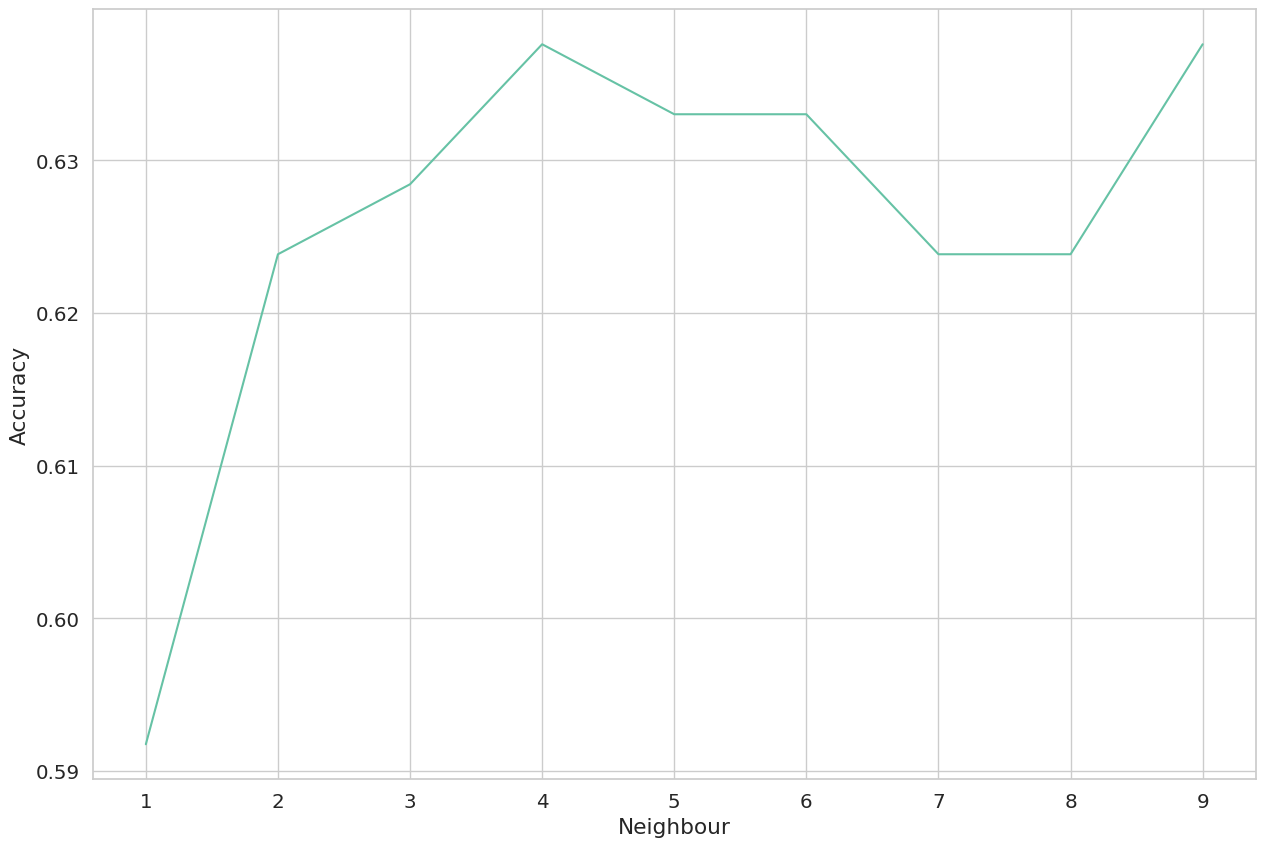

In [43]:
x = np.arange(1, 10, 1)
y=[]
for i in range(1, 10, 1) :
   pred = knn(x_test[['Age', 'Fare']], x_train[['Age', 'Fare']],  pd.DataFrame(y_train), i)
   ans = Accuracy(pred, y_test)
   y.append(ans)
print(y, '\n', np.max(np.array(y)))
plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.xlabel('Neighbour')
plt.ylabel('Accuracy')
plt.show()

Модель с евклидовой метрикой и min-max нормализацией данных

[0.5779816513761468, 0.6284403669724771, 0.6100917431192661, 0.591743119266055, 0.6376146788990825, 0.6284403669724771, 0.6467889908256881, 0.6605504587155964, 0.6559633027522935] 
 0.6605504587155964


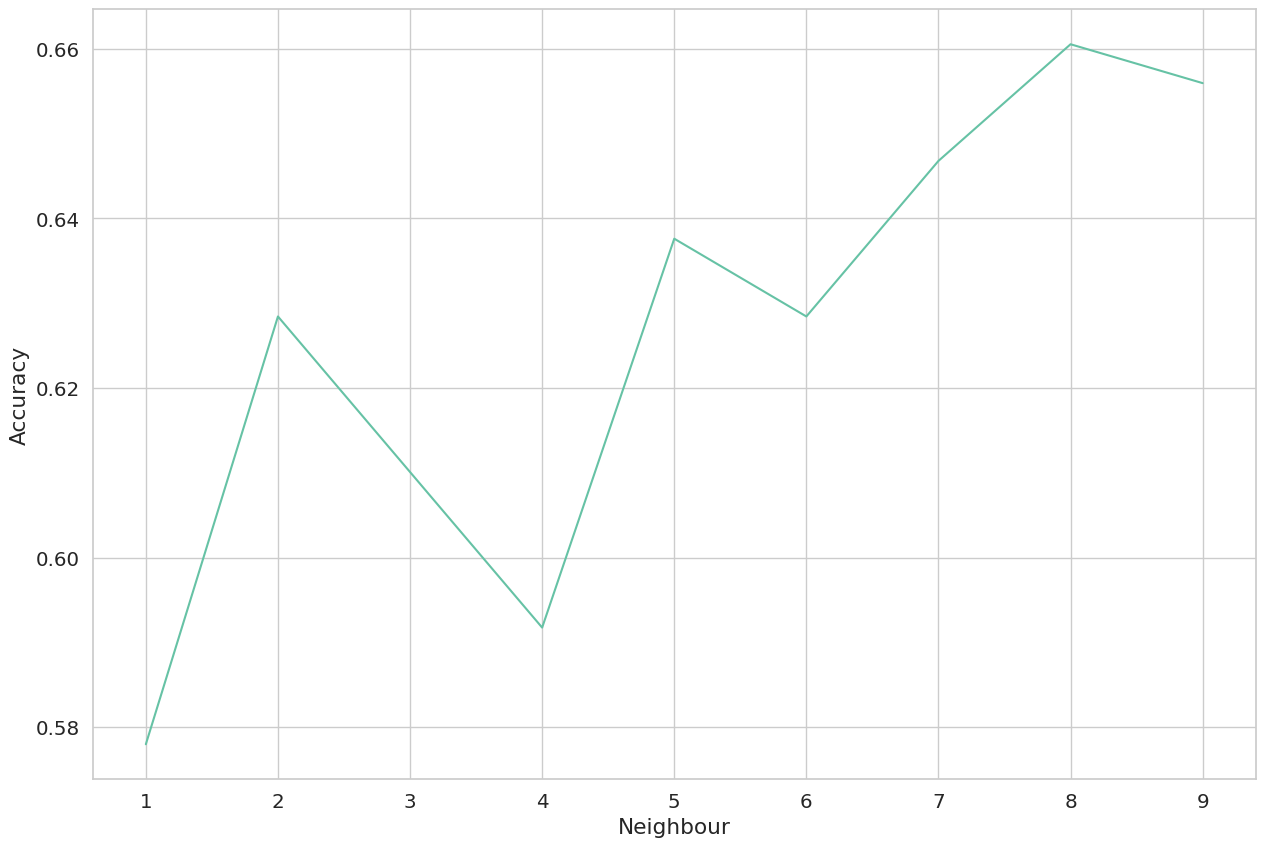

In [42]:
x = np.arange(1, 10, 1)
y=[]
for i in range(1, 10, 1) :
   pred = knn(features, train_features,  pd.DataFrame(y_train), i)
   ans = Accuracy(pred, y_test)
   y.append(ans)
print(y, '\n', np.max(np.array(y)))
plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.xlabel('Neighbour')
plt.ylabel('Accuracy')
plt.show()

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

При увеличение количества соседей точность на тестовой выборке увеличивалась, так как при совсем маленьком значении соседей выбросы имеют большее значение.

#### 6. Выводы

Из графиков и точности предсказаний деревьев видно, что больше всего на целевую переменную влияет пол и класс пассажира. А именно, выживаемость детей и женщин значительно выше 0,5 , так же принадлежность пассажиров 1 классу и больший доход увеличивали шанс выживания. По построенной модели kNN видно, что по признакам доход и возраст нельзя точки разделить на группы  так, чтобы значительно преобладал один класс над другим (выживших или нет), соответсвенно точность у нее и у дерева классифицирующего по этим признакам ниже, чем если людей классифицировать по полу